In [120]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [3]:
ucl

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,Kevin,Forward,22,Brazil,Shakhtar Donetsk,Premier Liga,League_phase,E,12.0,...,17,7,0,0,0,0,0,460,7,1
206,207,Cabella,Midfielder,35,France,Lille,Ligue 1,Round16,C,3.0,...,13,3,4,0,0,0,0,388,7,3
207,208,Locatelli,Midfielder,27,Italy,Juventus,Serie A,Knockout_phase,D,35.0,...,51,19,17,0,0,0,0,673,9,1
208,209,Palacios,Midfielder,26,Argentina,Bayer Leverkusen,Bundesliga,Round16,C,40.0,...,48,10,13,0,0,0,0,666,10,0


In [16]:
ucl[['Age','Total_attempts','Passes_completed','Chances_Created']].describe()

,Age,Total_attempts,Passes_completed,Chances_Created
count,210.000000,210.000000,210.000000,210.000000
mean,26.780952,12.661905,364.223810,10.123810
std,4.416110,11.322374,216.590771,7.911224
min,17.000000,0.000000,47.000000,0.000000
25%,24.000000,5.000000,209.250000,4.000000
50%,26.000000,10.000000,319.000000,9.000000
75%,29.750000,18.000000,450.000000,15.000000
max,39.000000,64.000000,1308.000000,39.000000


<Axes: xlabel='count', ylabel='Position'>

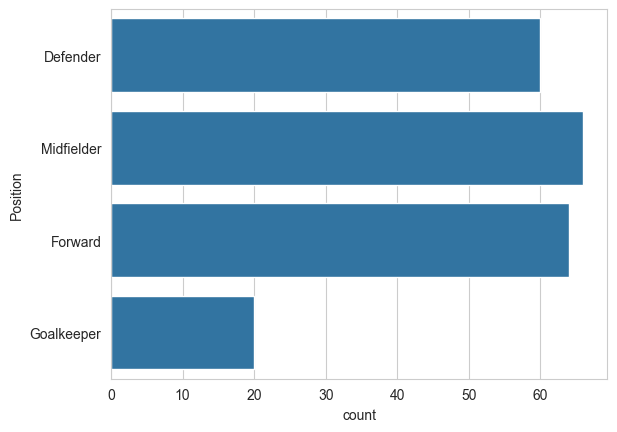

In [19]:
sns.countplot(ucl.Position)

In [82]:
bestplayer = ucl[ucl['MOTM_Awards'] > 2]

In [81]:
bestplayer.value_counts()

PlayerID  Player            Position    Age  Nationality  Team             Competitions  Phase            Phase_Tier  Value10^6  Jersey_Num  Rating  Goals  Assists  TopSpeed(km/h)  DistanceCovered(km)  Total_attempts  Dribbles  Passes_completed  Chances_Created  Balls_recovered  Tackles_Won  Tackles_Lost  Saves  Goals_Conceded  Clean_Sheets  MOTM_Awards  Minutes_played  Match_played  DNP
4         Raphinha          Forward     28   Brazil       Barcelona        La Liga       Semi_finals      A           80.0       11          8.31    13     9        34.7            126.8                52              24        433               39               18               2            7             0      0               0             3            1225            14            0      1
38        Vinicius Jr       Forward     24   Brazil       Real Madrid      La Liga       Quarter_finals   B           200.0      7           7.79    8      3        35.5            118.9                42         

In [87]:
young_age_old = ucl.Age.min(), ucl.Age.max()

In [90]:
print(young_age_old)

(np.int64(17), np.int64(39))


In [91]:
ucl.groupby("Player").mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001CB97FC3F80>>

In [94]:
values_stats = ucl['Value10^6'].describe()

values_stats

count    190.000000
mean      42.173684
std       36.846835
min        1.000000
25%       18.500000
50%       32.000000
75%       53.000000
max      200.000000
Name: Value10^6, dtype: float64

In [99]:
barcelona_players = ucl[ucl['Team'] == 'Barcelona']


In [100]:
barcelona_players

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
15,16,Yamal,Forward,17,Spain,Barcelona,La Liga,Semi_finals,A,180.0,...,19,5,5,0,0,0,1,1101,13,1
40,41,Kounde,Defender,26,France,Barcelona,La Liga,Semi_finals,A,60.0,...,56,8,5,0,0,0,0,1106,13,1
56,57,Pedri,Midfielder,22,Spain,Barcelona,La Liga,Semi_finals,A,80.0,...,52,3,4,0,0,0,2,1117,14,0
89,90,Inigo Martinez,Defender,33,Spain,Barcelona,La Liga,Semi_finals,A,5.0,...,50,4,8,0,0,0,1,958,11,3
111,112,Dani Olmo,Midfielder,27,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,16,2,2,0,0,0,0,440,9,5
141,142,Balde,Defender,21,Spain,Barcelona,La Liga,Semi_finals,A,60.0,...,31,6,3,0,0,0,0,804,10,4
147,148,Casado,Midfielder,21,Spain,Barcelona,La Liga,Semi_finals,A,30.0,...,40,20,15,0,0,0,0,631,10,4
163,164,Ferran Torres,Forward,25,Spain,Barcelona,La Liga,Semi_finals,A,28.0,...,3,3,4,0,0,0,0,421,11,3
